# Decahedral nanoparticle

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from stm.register import create_template
from stm.segment import segment_neighbors, segment_holes
from stm.utils.plotutils import add_segment_patches, discrete_cmap, add_colorbar

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
points = np.load('data/pt_decahedron.npy')

a=np.array([1., 0])
b=np.array([1/3., 2*np.sqrt(2)/3.])

template_1 = create_template(a, b, n_points=7)
template_2 = np.delete(template_1, [1,2], axis=0)

templates = [template_1, template_2]

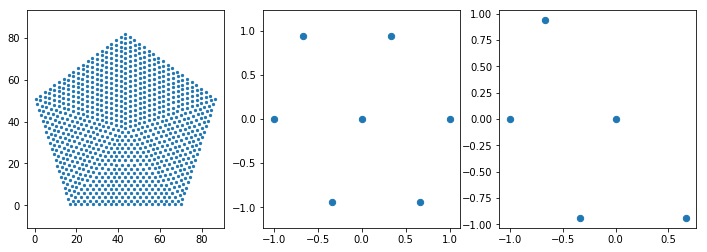

In [6]:
fig,axes=plt.subplots(1,3, figsize=(12,4))

axes[0].scatter(points[:,0], points[:,1], s=5)
axes[1].scatter(templates[0][:,0], templates[0][:,1], s=40)
axes[2].scatter(templates[1][:,0], templates[1][:,1], s=40)

for ax in axes:
    ax.axis('equal')

In [7]:
segments_1 = segment_neighbors(points, n_points = 7)
segments_2 = segment_neighbors(points, n_points = 5)

segments = segments_1 + segments_2
segments.match(templates, scale_invariant=True, rmsd_max=.1)

segments.calibrate_strain(proportiontocut=.4)

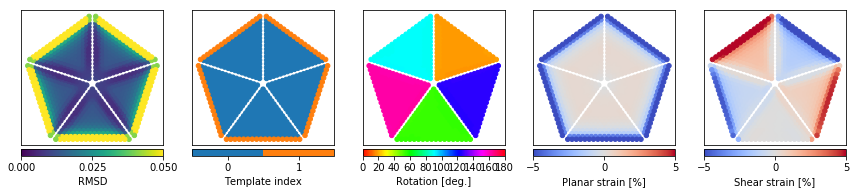

In [8]:
size=20
planar = (segments.strain[:,0,0] + segments.strain[:,1,1])/2

fig,axes = plt.subplots(1,5, figsize=(12,4))
m = axes[0].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.rmsd, vmin=0, vmax=.05, s=size)
add_colorbar(axes[0], m, loc='bottom', ticks=np.linspace(0,.05,3), label='RMSD')

m = axes[1].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.template_index, 
                cmap=discrete_cmap([0,1]), vmin=-.5, vmax=1.5, s=size)
add_colorbar(axes[1], m, loc='bottom', ticks=[0,1], label = 'Template index')

m = axes[2].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.rotation/np.pi*180, 
                cmap='hsv', vmin=0, vmax=180, s=size)
add_colorbar(axes[2], m, loc='bottom', label = 'Rotation [deg.]')

m = axes[3].scatter(segments.origins[:,0], segments.origins[:,1], c=planar * 100, 
                cmap='coolwarm', vmin=-5, vmax=5, s=size)
add_colorbar(axes[3], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Planar strain [%]')

axes[4].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.strain[:,0,1] * 100, 
                cmap='coolwarm', vmin=-5, vmax=5, s=size)
add_colorbar(axes[4], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Shear strain [%]')

for ax in axes.ravel():
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

## Segmentation by holes

In [9]:
segments = segment_holes(points, k=.6)

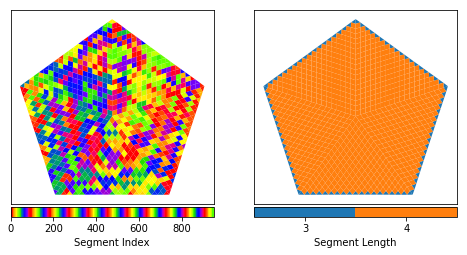

In [10]:
fig,axes = plt.subplots(1,2, figsize=(8,4))

m = add_segment_patches(axes[0], segments, np.arange(len(segments)), cmap='prism')
add_colorbar(axes[0], m, loc='bottom', label='Segment Index')

m = add_segment_patches(axes[1], segments, segments.lengths, cmap=discrete_cmap([0,1]), clim=[2.5,4.5])
add_colorbar(axes[1], m, loc='bottom', label='Segment Length', ticks=[3,4])

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

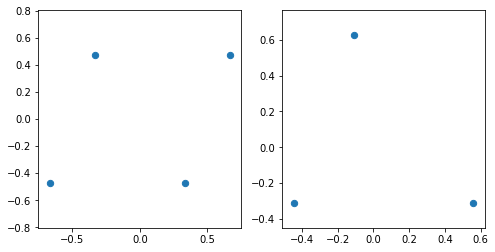

In [11]:
a=np.array([1.,0])
b=np.array([1/3., 2*np.sqrt(2)/3.])

indices = [(0,0),(1,0),(0,1),(1,1)]

template_1 = create_template(a, b, indices=indices, center='cop')

indices = [(0,0),(1,0),(0,1)]

template_2 = create_template(a, b, indices=indices, center='cop')

templates = [template_1, template_2]

fig,axes=plt.subplots(1,2, figsize=(8,4))

axes[0].scatter(templates[0][:,0], templates[0][:,1], s=40)
axes[1].scatter(templates[1][:,0], templates[1][:,1], s=40)

for ax in axes:
    ax.axis('equal')

In [12]:
segments.match(templates, rmsd_max=.4)

segments.calibrate_strain(.4)

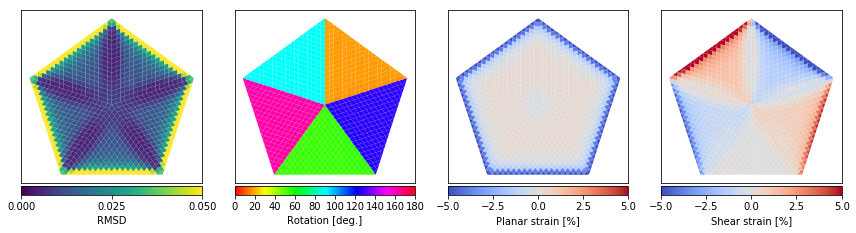

In [13]:
fig,axes = plt.subplots(1,4, figsize=(12,4))

m = add_segment_patches(axes[0], segments, segments.rmsd, cmap='viridis', clim=[0,.05])
add_colorbar(axes[0], m, loc='bottom', ticks=np.linspace(0,.05,3), label='RMSD')

m = add_segment_patches(axes[1], segments, segments.rotation/np.pi*180 % 180, cmap='hsv', clim=[0,180])
add_colorbar(axes[1], m, loc='bottom', label = 'Rotation [deg.]')

m = add_segment_patches(axes[2], segments, (segments.strain[:,0,0] + segments.strain[:,1,1])/2*100, 
                        cmap='coolwarm', clim=[-5,5])
add_colorbar(axes[2], m, loc='bottom', ticks=np.linspace(-5,5,5), label = 'Planar strain [%]')

m = add_segment_patches(axes[3], segments, segments.strain[:,0,1]*100, cmap='coolwarm', clim=[-5,5])
add_colorbar(axes[3], m, loc='bottom', ticks=np.linspace(-5,5,5), label = 'Shear strain [%]')

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()